# Flight Fare Prediction

You can download the dataset from : https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh

In [1]:
# importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading the dataset
train_data = pd.read_excel(r'FlightData_Train.xlsx')

In [3]:
# displaying all the columns in the dataset
pd.set_option('display.max_columns',None)

In [4]:
# Reading only first 5 rows of the dataset
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
# Checking the Shape of the Data.
train_data.shape

(10683, 11)

In [6]:
train_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


We observe that all the columns are of the string type except the Price column....so we need to convert some of the major columns like Time, Duration, Total_stops to int

In [7]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
29h 10m      1
30h 25m      1
40h 20m      1
47h 40m      1
32h 20m      1
Name: Duration, Length: 368, dtype: int64

In [8]:
# Checking for the Null Values.
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
# Dropping all the NAN values from our data since there is only 1 record containing NaN values.
train_data.dropna(inplace=True) 

In [10]:
# Sanity check...again checking for the NaN values after removing
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
train_data.shape

(10682, 11)

# EDA (Exploratory Data Analysis)

In [12]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [13]:
# Date_of_Journey column is Object column so converting first into datetime format then extracting more info form it.

train_data["Journey_day"] = pd.to_datetime(train_data['Date_of_Journey'],format='%d/%m/%Y').dt.day  #Extracting Day
train_data["Journey_month"] = pd.to_datetime(train_data['Date_of_Journey'],format='%d/%m/%Y').dt.month #Extracting Month
train_data.drop(['Date_of_Journey'],axis=1,inplace=True) # Dropping the Date_of_Journey column after extrating features 

# Note: we will not be extracting the year feature since we are having only 2019 data.

In [14]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [15]:
# Now Converting Dep_time column to datetime format

train_data['Dep_hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour  # Extracting Hours
train_data['Dep_minute'] = pd.to_datetime(train_data['Dep_Time']).dt.minute # Extracting Minutes
train_data.drop(['Dep_Time'],axis=1,inplace=True) # Dropping the column after extracting the features.


In [16]:
# Now our dataset looks like this!
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [17]:
#Arrival_Time column 

train_data['Arrival_hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data['Arrival_minute'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute
train_data.drop(['Arrival_Time'],axis=1,inplace=True)

In [18]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [19]:
'5h 25m'.split("m")[0].split()[0].split('h')[0] # Testing with a single data how to extract..

'5'

In [20]:
'  5h 25m  '.strip()

'5h 25m'

In [21]:
'5h 25m'.split("m")[0].split()[-1] # Testing with a single data how to extract..

'25'

In [22]:
train_data['Duration'].dtype # the datatype of the Duration column is object type!

dtype('O')

In [23]:
# Extracting the Numeric data from the Duration column

duration = list(train_data['Duration']) # First converting the column into list format

# Mainly in this function we are padding the front and end values ...to equal length.
for i in range(len(duration)) :
    if len(duration[i].split()) != 2 :
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m' #adds the 0m
        else :
            duration[i] = duration[i].strip()
            duration[i] = '0h ' + duration[i] #adding the 0h

            
# Now after making the length same we are splitting the gours and minutes
duration_hours = []
duration_minutes = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split("h")[0]))
    duration_minutes.append(duration[i].split("m")[0].split()[-1])





In [24]:
# Creating new columns for hours and minutes
train_data['duration_hours'] = duration_hours
train_data['duration_minutes'] = duration_minutes
train_data.drop(['Duration'],axis=1,inplace=True) # Dropping the old column after extracting the data.

In [25]:
# This is our new dataset looks like after extracting. Still we need to do more feature engineering on some more columns.
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [26]:
train_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [27]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

# Feature Engineering

## Categorical Data are of 2 types

1. Nominal data --> data are not in any order(eg. States column,or sex column or country column) --> OneHotEncoder is used in this case
2. Ordinal Data --> data are in order(something ranking and all ..eg. grade column, fees column) --> LabelEncoder is used in this case

also target mean encoding is also there....if cardinality is very very more....
High-cardinality column values are typically identification numbers, email addresses, or user names. An example of a data table column with high-cardinality would be a USERS table with a column named USER_ID.

In [28]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<Figure size 1440x720 with 0 Axes>

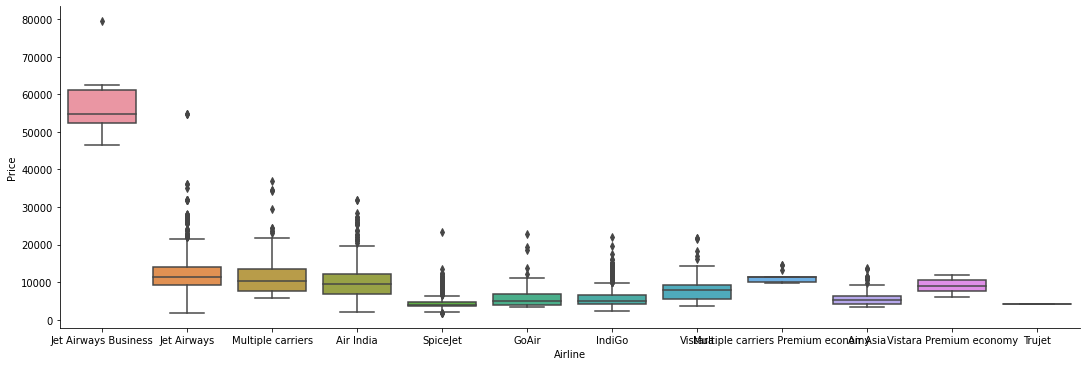

In [29]:
#Jet Airways business have the highest price
#apart from the first airline almost all are having similar median

# Airline vs Price 
plt.figure(figsize=(20,10))
sns.catplot(y='Price',x='Airline',data = train_data.sort_values("Price",ascending=False),kind="box",height=5,aspect=3)
plt.show()


In [30]:
# so as Airline is Nominal Categorical data we will perform OneHotEncoding
# because we cannot say that jet airways is greater or Indigo is bigger etc...

Airline = train_data[['Airline']]

# NOTE: with double [[]] you will get a dataframe and with single [] you will get a Series

Airline = pd.get_dummies(Airline,drop_first=True) # one hot encoding
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [31]:
train_data['Source'].value_counts() # Source is a Categorical Feature

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

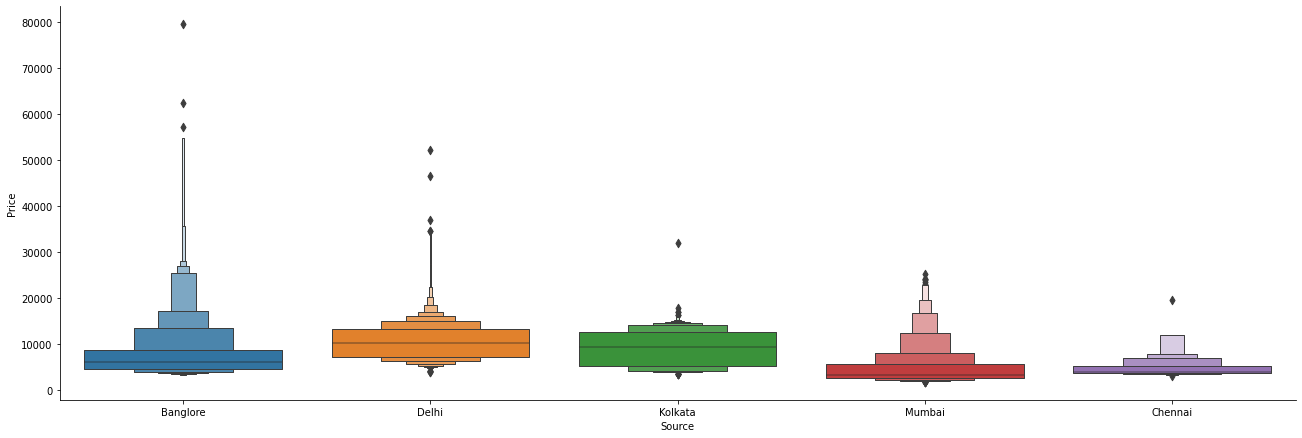

In [32]:
# Visualizing the Source column

sns.catplot(y='Price',x='Source',data=train_data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()
# we can also use kind = box ...for plotting the box plot

In [33]:
#As source is also a Nominal Categorical data so we did One Hot Encoding
Source = train_data[['Source']]
Source = pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [34]:
train_data['Destination'].value_counts() # Destination is also categorical feature

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [35]:
# So Destination column is also Nominal feature so we did one hot encoding
Destination = train_data[['Destination']]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [36]:
train_data['Route'] # This seems to be little complicated column!

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [37]:
train_data['Additional_Info'].value_counts() # Additional_Info is a Categorical column

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [38]:
# Additional info is having almost 80% no_info ie....missing values
# Route and total stops are actually related to each other
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [39]:
# Dropping the unnecessary columns
train_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [40]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [41]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [42]:
# This is basically Ordinal categorical feature because more no of stops more price
# so lets replace the values first then apply the LabelEncoder
train_data.replace({'non-stop' : 0 , '1 stop' : 1,'2 stops' : 2,'3 stops' : 3,'4 stops' : 4},inplace=True)

In [43]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [44]:
#now concatenate dataframe --> train_data + all One Hot Encoded columns (Airline + Source + Destination)

data_train = pd.concat([train_data,Airline,Source,Destination],axis=1)

In [45]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration_hours,duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [46]:
# Dropping the Airline , Source , Destination column after converting into numerical values.
data_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

## Train Data Ready after preprocessing !!

In [47]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration_hours,duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [48]:
data_train.shape

(10682, 30)

# Test Data

Reading the Test Data and following the same preprocessing steps as followed in the Training Data

In [49]:
test_data = pd.read_excel('FlightData_Test.xlsx')

In [50]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [51]:
#Preprocessing steps

# Date_of_Journey column 
test_data["Journey_day"] = pd.to_datetime(test_data['Date_of_Journey'],format='%d/%m/%Y').dt.day
test_data["Journey_month"] = pd.to_datetime(test_data['Date_of_Journey'],format='%d/%m/%Y').dt.month
test_data.drop(['Date_of_Journey'],axis=1,inplace=True)

# Now lets edit our Dep_time column
test_data['Dep_hour'] = pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_minute'] = pd.to_datetime(test_data['Dep_Time']).dt.minute
test_data.drop(['Dep_Time'],axis=1,inplace=True)

# Arrival_time column
test_data['Arrival_hour'] = pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['Arrival_minute'] = pd.to_datetime(test_data['Arrival_Time']).dt.minute
test_data.drop(['Arrival_Time'],axis=1,inplace=True)

# Duration column numeric value extraction
duration = list(test_data['Duration'])
for i in range(len(duration)) :
    if len(duration[i].split()) != 2 :
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m' #adds the 0m
        else :
            duration[i] = duration[i].strip()
            duration[i] = '0h ' + duration[i] #adding the 0h
            
duration_hours = []
duration_minutes = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split("h")[0]))
    duration_minutes.append(duration[i].split("m")[0].split()[-1])

test_data['duration_hours'] = duration_hours
test_data['duration_minutes'] = duration_minutes
test_data.drop(['Duration'],axis=1,inplace=True)


# Now lets handle the Categorical features...
# Now lets handle the Categorical features...# NOTE: with double [[]] you will get a dataframe and with single [] you will get a Series

Airline = test_data[['Airline']]
Airline = pd.get_dummies(Airline,drop_first=True)

Source = test_data[['Source']]
Source = pd.get_dummies(Source,drop_first=True)

Destination = test_data[['Destination']]
Destination = pd.get_dummies(Destination,drop_first=True)

# Drop these 2 columns as Route is not needed coz you already have Total_stops and 80% of Additional_info is no_info
test_data.drop(['Route','Additional_Info'],axis=1,inplace=True)


# This is basically nominal categorical feature coz more no of stops more price
# so lets replace the values first then apply the LabelEncoder
test_data.replace({'non-stop' : 0 , '1 stop' : 1,'2 stops' : 2,'3 stops' : 3,'4 stops' : 4},inplace=True)

#Concatinate all the data frames at the end
data_test = pd.concat([test_data,Airline,Source,Destination],axis=1)

# Now Remove the Airline Source Destination columns

data_test.drop(['Airline', 'Source' , 'Destination'],axis=1,inplace=True)


In [52]:
data_test.shape # 29 columns in test data because output label is not there in Test data!

(2671, 28)

In [53]:
data_train['Airline_Trujet'].value_counts() # only 1 value for this Airline_Truejet variable in training data !

0    10681
1        1
Name: Airline_Trujet, dtype: int64

In [54]:
data_test.head(2)

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration_hours,duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


# Feature Selection 

Finding out the best feature which will contribute and have good relation with the target variable
some feature selection methods are :

1. Heatmap
2. feature_importance_
3. SelectKBest
4. Extra Tree Regressor

feature scaling depends on the type of algorithim that you are going to do ....in randomforest you dont need feature scaling


In [55]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_minute', 'Arrival_hour', 'Arrival_minute', 'duration_hours',
       'duration_minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [56]:
X=data_train.loc[:,['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_minute', 'Arrival_hour', 'Arrival_minute', 'duration_hours',
       'duration_minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration_hours,duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [57]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,duration_hours,duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [58]:
y = data_train['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

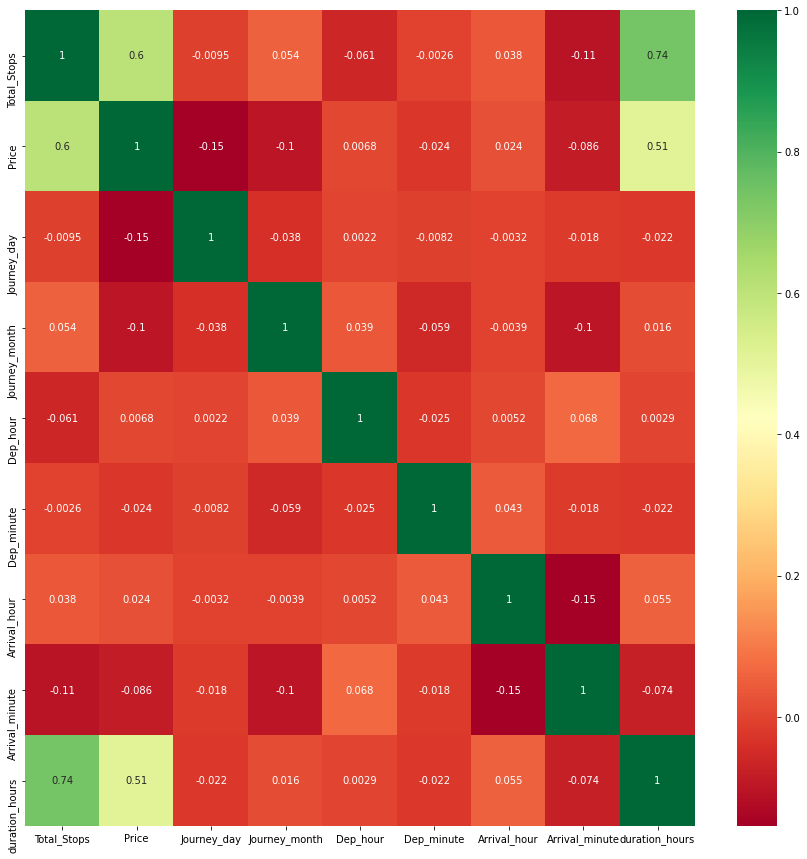

In [59]:
# Finding the correlation between the independent and dependent variable

plt.figure(figsize=(15,15))
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [60]:
#Important features using ExtraTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)


ExtraTreesRegressor()

In [61]:
selection.feature_importances_

array([2.33764225e-01, 1.44130005e-01, 5.31355904e-02, 2.40592009e-02,
       2.09054855e-02, 2.79973030e-02, 1.91017711e-02, 1.15185281e-01,
       1.74386599e-02, 1.08569214e-02, 2.01193009e-03, 1.79422547e-02,
       1.41154705e-01, 6.73176744e-02, 1.95192537e-02, 8.63881346e-04,
       3.27578994e-03, 1.04693244e-04, 5.11532280e-03, 9.12484374e-05,
       6.10145099e-04, 9.74783943e-03, 3.16865661e-03, 5.68864432e-03,
       1.03477682e-02, 1.51651398e-02, 5.93326616e-03, 4.43113104e-04,
       2.49242306e-02])

<AxesSubplot:>

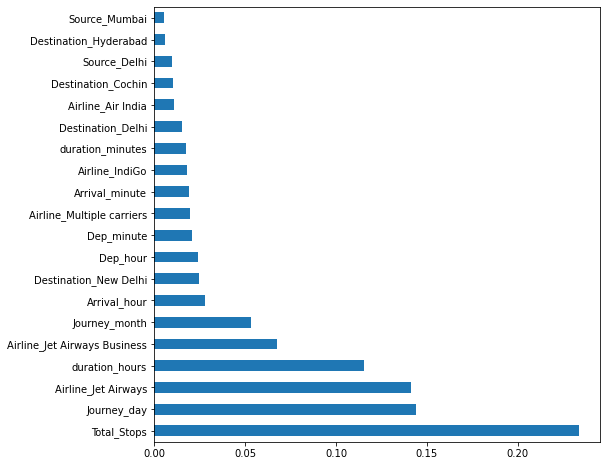

In [62]:
plt.figure(figsize=(8,8))
feat_importances = pd.Series(selection.feature_importances_ , index=X.columns)
feat_importances.nlargest(20).plot(kind='barh') # visualizing the top 20 features only!


# Fit the model using the Random Forest Regressor



1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
    1. Scaling is not done in Random forest
4. Import model
5. Fit the data
6. Predict w.r.t X_test
7. In regression check RSME Score
Plot graph

In [63]:
# Splitting the data into Test and Train 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [65]:
y_pred = model.predict(X_test)

In [66]:
# Training Data
model.score(X_train,y_train) # Return the coefficient of determination R^2 of the prediction.

0.9530577585484705

In [67]:
# Testing Data
model.score(X_test,y_test) # Return the coefficient of determination R^2 of the prediction.

0.798940633880336

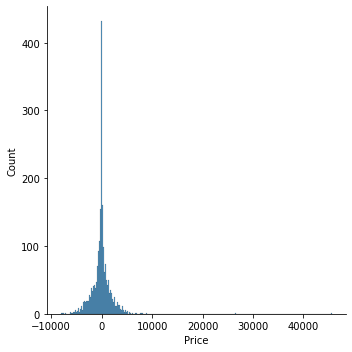

In [68]:
# Plotting the Residuals
sns.displot(y_test-y_pred)
plt.show()

d:\anacondafiles\envs\deeplearning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Price'>

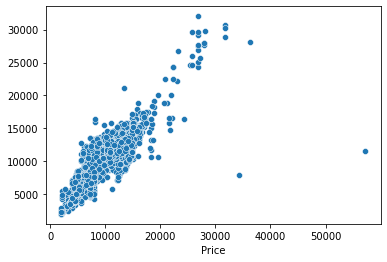

In [69]:
# Plotting the Residuals via Scatter Plot
sns.scatterplot(y_test,y_pred)

# Evaluating the model using some Regression Metrics

In [70]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1178.190003324744
MSE: 4335253.3767724605
RMSE: 2082.127127908491


In [71]:
metrics.r2_score(y_test,y_pred) # R^2 value

0.798940633880336

## Hyperparameter tuning

1. Choose following method for hyperparameter tuning
2. RandomizedSearchCV --> Fast
3. GridSearchCV
4. Assign hyperparameters in form of dictionery
5. Fit the model
6. Check best paramters and best score


In [72]:
from sklearn.model_selection import RandomizedSearchCV

In [73]:
#Randomized Search CV....defining some options for the Random Forest

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [74]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [75]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
model_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [76]:
model_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   45.5s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [77]:
model_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [78]:
prediction = model_random.predict(X_test)

<Figure size 576x576 with 0 Axes>

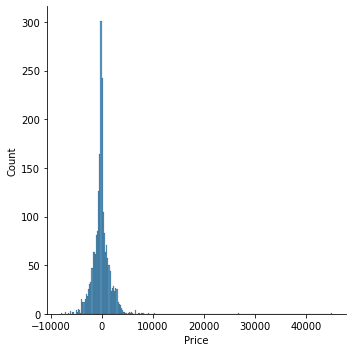

In [79]:
plt.figure(figsize = (8,8))
sns.displot(y_test-prediction)
plt.show()

d:\anacondafiles\envs\deeplearning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Price'>

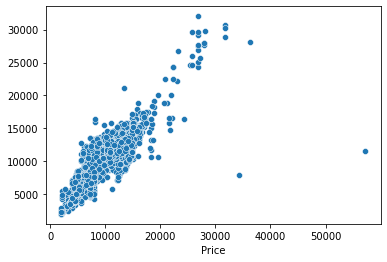

In [80]:
sns.scatterplot(y_test,y_pred)

In [81]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1178.190003324744
MSE: 4335253.3767724605
RMSE: 2082.127127908491


In [82]:
metrics.r2_score(y_test,y_pred)

0.798940633880336

## Saving our model to Reuse it again

In [83]:
import pickle

file = open('flight_random_forest.pkl','wb')
pickle.dump(model_random,file)


In [84]:
model = open('flight_random_forest.pkl','rb')
forest = pickle.load(model)
y_prediction = forest.predict(X_test)

In [123]:
metrics.r2_score(y_test,y_prediction)

0.8122669954566331